In [40]:
import pandas as pd

aaa = pd.read_csv (
	r"M:\work\project_program\bishe\pyproject\RL_pid_control_critic_actor\强化学习+Lstm\rewards_recoard\_2022_7_17_21_41_37_rewards.csv")
aaa["rewards"]

0        -415.729258
1        -422.015414
2        -106.894923
3       -1818.488900
4       -1819.690231
            ...     
3252     -106.991059
3253     -361.271506
3254   -33529.443208
3255    -1819.365586
3256    -1819.654475
Name: rewards, Length: 3257, dtype: float64

In [41]:
bbb = aaa["rewards"]
ccc = bbb.values

In [42]:
ddd = ccc.tolist ()
type (ddd)

list

In [43]:
ddd

[-415.7292583503055,
 -422.0154137470182,
 -106.89492289970632,
 -1818.488900378536,
 -1819.6902306443912,
 -106.79736097140083,
 -106.93929037013908,
 -1818.850737545274,
 -39879.05670216077,
 -976.505986910993,
 -1818.694381351547,
 -1819.201546872636,
 -43683.82581171355,
 -976.1428981937228,
 -1820.4182353609503,
 -410.05542247877,
 -975.7970272540072,
 -47646.78426905105,
 -979.354787605662,
 -976.0206756536072,
 -46057.91838998437,
 -33759.00036266068,
 -106.83904349079997,
 -976.3808306013412,
 -419.9725270169973,
 -106.98442827804196,
 -1821.866689887114,
 -107.02486860751289,
 -420.617636344618,
 -975.5920891677282,
 -976.1617111175332,
 -107.03657557539198,
 -423.1330371620288,
 -20658.536788359183,
 -41574.400895800834,
 -45140.051716795024,
 -416.7315466110859,
 -1818.6435411881089,
 -976.915433564094,
 -43289.3888199797,
 -23986.273490046984,
 -1818.4352157298435,
 -107.01817531579344,
 -420.17680844334456,
 -35885.673471144895,
 -107.03283313406445,
 -42746.3211600667,
 -

In [44]:
word = [15,5,65,6945,6,64,87]
word[::-1]

[87, 64, 6, 6945, 65, 5, 15]

In [45]:
df = pd.DataFrame ({'Animal': ['Falcon','Falcon',
                               'Parrot','Parrot'],
                    'Max Speed': [380.,370.,24.,26.],'Min_Speed': [1.,10.,14.,16.]})
df

,Animal,Max Speed,Min_Speed
0,Falcon,380.0,1.0
1,Falcon,370.0,10.0
2,Parrot,24.0,14.0
3,Parrot,26.0,16.0


In [46]:

aaa = df.groupby (['Animal'])
dir (aaa)

['Animal',
 'Min_Speed',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_agg_examples_doc',
 '_agg_general',
 '_agg_py_fallback',
 '_aggregate_frame',
 '_aggregate_item_by_item',
 '_aggregate_with_numba',
 '_apply_allowlist',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_bool_agg',
 '_can_use_transform_fast',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_general',
 '_cython_transform',
 '_define_paths',
 '_dir_additions',
 '_dir_deletions',
 '_fill',
 '_get_

In [47]:
aaa.cov ()

Max Speed  Min_Speed
Animal                                
Falcon Max Speed       50.0      -45.0
       Min_Speed      -45.0       40.5
Parrot Max Speed        2.0        2.0
       Min_Speed        2.0        2.0

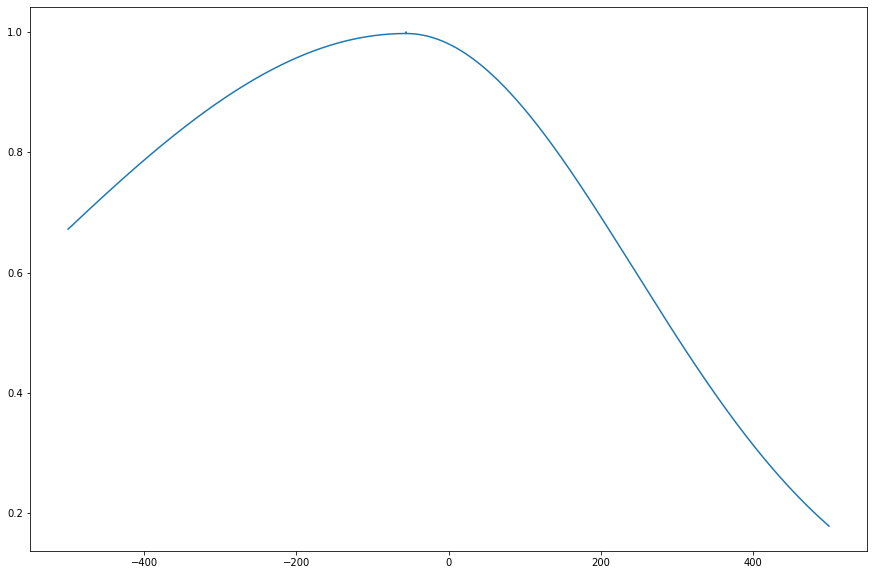

In [48]:
import matplotlib.pyplot as plt
import math


def cal_reward (speed):
	# 线性函数
	# if speed < 29.276 and speed > -141.276:
	# 	reward = -0.001 * speed ** 2 - 0.112 * speed + 4.136
	# elif speed < -141.276:
	# 	reward = 0.01 * speed + 1.2
	# else:
	# 	reward = -0.2 * speed + 6
	if speed<-56:
		mu,sigma = -56,500
		reward=(1/(math.sqrt(2*math.pi)*sigma)*math.e**(-(speed-mu)**2/(2*sigma**2)))*1250
	elif speed>-56:
		mu,sigma = -56,300
		reward=(1/(math.sqrt(2*math.pi)*sigma)*math.e**(-(speed-mu)**2/(2*sigma**2)))*750
	else:
		reward=1


	# Gamma分布
	# x=speed
	# alpha,beta=0.5,0.5
	# reward = (x**(alpha-1)*math.exp(-x/beta))/(math.gamma(alpha)*beta**alpha)

	# 对数正态分布
	# mu,sigma = 0,1/2
	# reward = ((1 / (math.sqrt (2 * math.pi) * sigma*speed)) * math.e ** (-(math.log(speed,math.e) - mu) ** 2 / (2 * sigma ** 2)))

	return reward


def plot_reward ():
	temp = []
	xlist = []
	for i in range (int (1000 / 0.01)):
		xlist.append (-500+ 0.01 * i)

	for i in xlist:
		aaa = cal_reward (i)
		temp.append (aaa)

	plt.figure (figsize=(15,10))
	plt.plot (xlist,temp)
	plt.show ()

plot_reward ()

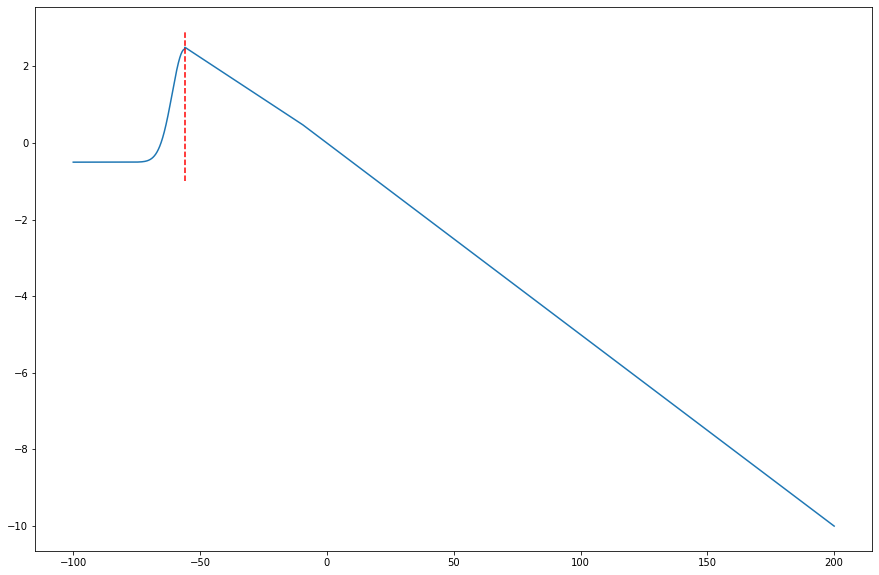

In [114]:
import matplotlib.pyplot as plt
import math


def cal_reward (speed):
	# 线性函数
	# if speed < 29.276 and speed > -141.276:
	# 	reward = -0.001 * speed ** 2 - 0.112 * speed + 4.136
	# elif speed < -141.276:
	# 	reward = 0.01 * speed + 1.2
	# else:
	# 	reward = -0.2 * speed + 6
	if speed<=-56:
		mu,sigma = -56,5
		reward=(1/(math.sqrt(2*math.pi)*sigma)*math.e**(-(speed-mu)**2/(2*sigma**2)))*37-0.5

	elif -10>=speed>-56:
		reward=(-1/23)*speed+(1/2-10/23)
	elif speed>-10:
		reward=(-1/20)*speed#+(19/42)
	else:
		print("计算奖励错误")



	# Gamma分布
	# x=speed
	# alpha,beta=0.5,0.5
	# reward = (x**(alpha-1)*math.exp(-x/beta))/(math.gamma(alpha)*beta**alpha)

	# 对数正态分布
	# mu,sigma = 0,1/2
	# reward = ((1 / (math.sqrt (2 * math.pi) * sigma*speed)) * math.e ** (-(math.log(speed,math.e) - mu) ** 2 / (2 * sigma ** 2)))

	return reward


def plot_reward ():
	temp = []
	xlist = []
	for i in range (int (300/ 0.01)):
		xlist.append (-100+ 0.01 * i)

	for i in xlist:
		aaa = cal_reward (i)
		temp.append (aaa)

	X=[-56]*40
	Y=[-1+0.1*x for x in range(40)]
	plt.figure (figsize=(15,10))
	plt.plot (xlist,temp)
	plt.plot (X,Y,'r--')
	plt.show ()

plot_reward ()

In [50]:
import numpy as np
with open (r'M:\work\project_program\bishe\pyproject\RL_pid_control_critic_actor\强化学习+Lstm\replay_buff_\numpy_binary.npy','rb') as f:
	a = np.load (f,allow_pickle=True)
a

array([], dtype=object)

[-50.0,
 -49.9,
 -49.8,
 -49.7,
 -49.6,
 -49.5,
 -49.4,
 -49.3,
 -49.2,
 -49.1,
 -49.0,
 -48.9,
 -48.8,
 -48.7,
 -48.6,
 -48.5,
 -48.4,
 -48.3,
 -48.2,
 -48.1,
 -48.0,
 -47.9,
 -47.8,
 -47.7,
 -47.6,
 -47.5,
 -47.4,
 -47.3,
 -47.2,
 -47.1,
 -47.0,
 -46.9,
 -46.8,
 -46.7,
 -46.6,
 -46.5,
 -46.4,
 -46.3,
 -46.2,
 -46.1,
 -46.0,
 -45.9,
 -45.8,
 -45.7,
 -45.6,
 -45.5,
 -45.4,
 -45.3,
 -45.2,
 -45.1,
 -45.0,
 -44.9,
 -44.8,
 -44.7,
 -44.6,
 -44.5,
 -44.4,
 -44.3,
 -44.2,
 -44.1,
 -44.0,
 -43.9,
 -43.8,
 -43.7,
 -43.6,
 -43.5,
 -43.4,
 -43.3,
 -43.2,
 -43.1,
 -43.0,
 -42.9,
 -42.8,
 -42.7,
 -42.6,
 -42.5,
 -42.4,
 -42.3,
 -42.2,
 -42.1,
 -42.0,
 -41.9,
 -41.8,
 -41.7,
 -41.6,
 -41.5,
 -41.4,
 -41.3,
 -41.2,
 -41.1,
 -41.0,
 -40.9,
 -40.8,
 -40.7,
 -40.6,
 -40.5,
 -40.4,
 -40.3,
 -40.2,
 -40.1,
 -40.0,
 -39.9,
 -39.8,
 -39.7,
 -39.6,
 -39.5,
 -39.4,
 -39.3,
 -39.2,
 -39.1,
 -39.0,
 -38.9,
 -38.8,
 -38.7,
 -38.6,
 -38.5,
 -38.4,
 -38.3,
 -38.2,
 -38.1,
 -38.0,
 -37.9,
 -37.8,
 -37.7,
 -37.6,


In [52]:
for i in a:
	state,action,reward,next_state=i
	print(state,action,reward,next_state)
	break

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import random
import os,time

from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

def get_str_time ():
	s = '_'
	for i in time.localtime (time.time ())[0:6]:
		s += str (i) + '_'
	return s


def preprocess (data_array: np.ndarray,train_size: float,val_size: float):
	"""Splits data into train/val/test sets and normalizes the data.

	Args:
		data_array: ndarray of shape `(num_time_steps, num_routes)`
		train_size: A float value between 0.0 and 1.0 that represent the proportion of the dataset
			to include in the train split.
		val_size: A float value between 0.0 and 1.0 that represent the proportion of the dataset
			to include in the validation split.

	Returns:
		`train_array`, `val_array`, `test_array`
	"""

	num_time_steps = data_array.shape[0]
	num_train,num_val = (
		int (num_time_steps * train_size),
		int (num_time_steps * val_size),
	)
	train_array = data_array[:num_train]
	mean,std = train_array.mean (axis=0),train_array.std (axis=0)

	train_array = (train_array - mean) / std
	val_array = (data_array[num_train: (num_train + num_val)] - mean) / std
	test_array = (data_array[(num_train + num_val):] - mean) / std

	return train_array,val_array,test_array,mean,std


def get_lstm_data (data,sequence_len):
	features = []
	target = []
	data_len = len (data)
	for i in range (0,data_len - sequence_len):
		X = data.iloc[i:sequence_len + i][:].to_numpy ()
		y = data.iloc[sequence_len + i][0:11].to_numpy ()
		features.append (X)
		target.append (y)
	return np.array (features),np.array (target)


def create_batch_data (X,y,train = True,buffer_size = 1000,batch_size = 128):
	batch_data = tf.data.Dataset.from_tensor_slices ((tf.constant (X),tf.constant (y)))
	if train:
		return batch_data.cache ().shuffle (buffer_size).batch (batch_size)
	else:
		return batch_data.batch (batch_size)


total_data = pd.read_csv ("processed_data.csv")
train_size,val_size = 0.5,0.2

train_array,val_array,test_array,mean,std = preprocess (total_data,train_size,val_size)
print (f"train set size: {train_array.shape}")
print (f"validation set size: {val_array.shape}")
print (f"test set size: {test_array.shape}")

train_datasets,train_labels = get_lstm_data (train_array,10)
train_batch_dataset = create_batch_data (train_datasets,train_labels)
val_datasets,val_labels = get_lstm_data (val_array,10)
val_batch_dataset = create_batch_data (val_datasets,val_labels)
test_datasets,test_labels = get_lstm_data (test_array,10)

action_min,action_max = np.amin (train_array.iloc[:,-1]),np.amax (train_array.iloc[:,-1])

train set size: (18164, 12)
validation set size: (7265, 12)
test set size: (10900, 12)


In [54]:
train_datasets.shape

(18154, 10, 12)

In [55]:
def cal_origin_val (pos,now_val):
	"""
	计算未归一化的值
	"""
	val = now_val * std[pos] + mean[pos]
	return val
res=[]
for i in train_datasets:
	temp=i[0]
	res.append(cal_origin_val(1,temp.tolist()[1]))

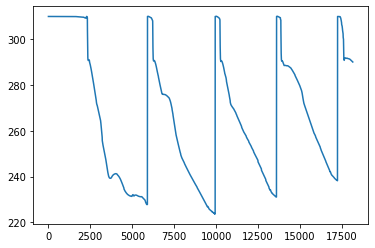

In [56]:
def cal_origin_val (pos,now_val):
	"""
	计算未归一化的值
	"""
	val = now_val * std[pos] + mean[pos]
	return val
plt.plot(res)
plt.show()

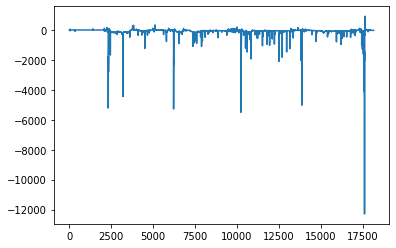

In [57]:
temp=res[0]
result=[]
for i in res[1:]:
	speed=(i-temp)*3600
	temp=i
	if speed>50000:
		continue
	result.append(speed)
plt.plot(result)
plt.show()


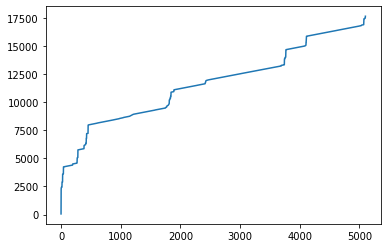

In [58]:
speeds_index=[]
for num,val in enumerate(result):
	if -66<val<-46.0:
		speeds_index.append(num)

plt.plot(speeds_index)
plt.show()

In [59]:
resss=[]
for num,val in enumerate(speeds_index):
	if num+1<len(speeds_index) and speeds_index[num+1]-val<5:
		continue
	resss.append(val)
resss

[56,
 2160,
 2302,
 2318,
 2375,
 2436,
 2441,
 2890,
 3606,
 3625,
 4399,
 4571,
 4578,
 4594,
 4818,
 5045,
 5051,
 5068,
 5858,
 6141,
 6147,
 6158,
 6173,
 6181,
 6193,
 6211,
 6270,
 6342,
 6777,
 7220,
 7942,
 8523,
 8748,
 8753,
 8779,
 8794,
 8811,
 8821,
 8842,
 8859,
 8866,
 9475,
 9515,
 9522,
 9547,
 9553,
 9591,
 9616,
 9631,
 9658,
 9671,
 9699,
 9711,
 9723,
 9735,
 9758,
 9770,
 9786,
 9804,
 9816,
 9824,
 9849,
 9856,
 9880,
 10190,
 10196,
 10208,
 10221,
 10356,
 10521,
 10932,
 11082,
 11630,
 11668,
 11710,
 11743,
 11762,
 11816,
 11864,
 11880,
 11890,
 11900,
 11905,
 13211,
 13239,
 13315,
 13383,
 13840,
 13848,
 13858,
 13972,
 14043,
 14528,
 14559,
 14608,
 14988,
 15033,
 15048,
 15076,
 15299,
 15307,
 15430,
 15449,
 15832,
 16797,
 16817,
 16827,
 16836,
 16883,
 16966,
 17076,
 17401,
 17412,
 17424,
 17444,
 17503,
 17633]

In [60]:
begin_index = [2500,6500,11000,14500]
def sss():
	state = random.sample (begin_index,1)
	return state

In [61]:

for i in range(10):
	aaa=sss()
	print(aaa)

[14500]
[6500]
[2500]
[6500]
[6500]
[6500]
[2500]
[11000]
[6500]
[11000]


In [62]:
import random
begin_index = range(1800, 36000,500)
state = random.sample(begin_index,1)[0]  # 10420]
state

18300

In [63]:
import numpy as np
with open (
		r'M:\work\project_program\bishe\pyproject\RL_pid_control_critic_actor\强化学习+Lstm\LSTM模型\用于训练lstm的数据.npy',
		'rb') as f:
	train_datasets = np.load (f,allow_pickle=True)
train_datasets.shape

(3,)

In [64]:
train_datasets[0][1900]

array([[-2.40604548e-01, -3.74108231e-01, -4.07336631e-01,
        -3.92000315e-01,  6.93496389e-01,  3.63393196e-01,
         1.13684273e+00,  2.27495106e-01, -1.15226569e-02,
        -5.40164916e-01, -4.88561233e-02, -9.82779257e-01],
       [-2.42269234e-01, -3.75376664e-01, -4.08325081e-01,
        -3.93077101e-01,  6.93496389e-01,  3.63393196e-01,
         1.13540983e+00,  2.27495106e-01, -1.00484483e-02,
        -5.38784456e-01, -4.80935955e-02, -9.82779257e-01],
       [-2.43923911e-01, -3.76801212e-01, -4.09443163e-01,
        -3.94165918e-01,  6.93496389e-01,  3.63393196e-01,
         1.13384448e+00,  2.27495106e-01, -8.58949005e-03,
        -5.37725033e-01, -4.72617469e-02, -9.82779257e-01],
       [-2.45598605e-01, -3.78186732e-01, -4.10545042e-01,
        -3.95256238e-01,  6.93496389e-01,  3.63393196e-01,
         1.13207444e+00,  2.27495106e-01, -7.12036487e-03,
        -5.37307684e-01, -4.64298983e-02, -9.82779257e-01],
       [-2.47393397e-01, -3.79630794e-01, -4.1164692

In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (1, 10, 12)
x = np.array([train_datasets[0][1900]])
y = tf.keras.layers.Conv1D(32, 3, activation='hard_sigmoid',input_shape=input_shape[1:])(x)


In [66]:
y.numpy()[0]

array([[0.5263605 , 0.54190886, 0.44095406, 0.37487924, 0.59490806,
        0.5465711 , 0.5665162 , 0.563851  , 0.6762147 , 0.5663673 ,
        0.50091   , 0.4724424 , 0.50901765, 0.5525214 , 0.5202611 ,
        0.6578891 , 0.59340173, 0.5851425 , 0.5478735 , 0.4591495 ,
        0.45294622, 0.45723578, 0.43184566, 0.62738883, 0.40695673,
        0.48601523, 0.52139646, 0.4829778 , 0.52831244, 0.3667953 ,
        0.5264589 , 0.37981704],
       [0.5263913 , 0.54198503, 0.4409138 , 0.37483093, 0.5948468 ,
        0.5467455 , 0.5668742 , 0.56396025, 0.67597425, 0.56653464,
        0.5011993 , 0.47233564, 0.5089698 , 0.552406  , 0.5202043 ,
        0.6577102 , 0.593418  , 0.5852657 , 0.54796296, 0.45923766,
        0.45286754, 0.45720243, 0.4316454 , 0.6274175 , 0.4069454 ,
        0.48591518, 0.5212638 , 0.4829046 , 0.52840096, 0.36665004,
        0.52620196, 0.3796911 ],
       [0.52639866, 0.5420738 , 0.4408877 , 0.3747889 , 0.59476244,
        0.54694515, 0.56721705, 0.5640481 , 0.6757

In [67]:
z = layers.GlobalAveragePooling1D()(y)
z.numpy()

array([[0.5270357 , 0.5424101 , 0.441289  , 0.37580258, 0.5952708 ,
        0.54711336, 0.56824607, 0.563703  , 0.6752075 , 0.5671254 ,
        0.50155216, 0.47091323, 0.5082902 , 0.5503585 , 0.51957184,
        0.65821385, 0.59259456, 0.5860375 , 0.5487253 , 0.45838612,
        0.45313784, 0.4570458 , 0.43053204, 0.6275142 , 0.40835726,
        0.4863943 , 0.5213715 , 0.48325208, 0.529625  , 0.3663552 ,
        0.52561814, 0.37939653]], dtype=float32)

In [31]:
actions=tf.random.normal((128,1))
actions

<tf.Tensor: shape=(128, 1), dtype=float32, numpy=
array([[ 3.0106816e-01],
       [ 3.2545321e+00],
       [ 2.2232144e-01],
       [-1.5751836e+00],
       [-2.1334376e+00],
       [-7.6896900e-01],
       [-3.0624127e-01],
       [ 6.2224030e-01],
       [ 1.8279156e-01],
       [ 2.0611918e+00],
       [-1.2291871e+00],
       [ 4.2097099e-02],
       [ 1.5297513e+00],
       [ 1.2519370e+00],
       [-8.0723000e-01],
       [ 4.6951634e-01],
       [ 4.6789303e-01],
       [-1.2192698e+00],
       [-1.2979218e-01],
       [-3.7401119e-01],
       [ 4.6491173e-01],
       [ 6.4463174e-01],
       [ 1.9891153e-01],
       [-5.1215404e-01],
       [-1.5737616e+00],
       [ 7.7311021e-01],
       [-1.0094140e-01],
       [-3.5781947e-01],
       [-3.4456271e-01],
       [-1.7221658e+00],
       [ 1.4049933e+00],
       [-1.6267080e-02],
       [ 1.0743053e+00],
       [ 1.9346827e+00],
       [-2.1557765e+00],
       [ 6.5971816e-01],
       [ 9.3639129e-01],
       [-1.8611747e+00],


In [32]:
obs=tf.random.normal((128,10,12))
obs

<tf.Tensor: shape=(128, 10, 12), dtype=float32, numpy=
array([[[ 0.17940286,  0.22420153,  1.1849947 , ..., -0.49850956,
          0.6223175 ,  1.2012068 ],
        [ 0.9420246 ,  0.21816966, -0.0177827 , ...,  0.8490066 ,
         -0.09040014,  1.2170126 ],
        [ 0.85662854, -0.19930029,  0.52567816, ..., -0.7616665 ,
         -0.00344584, -0.37256044],
        ...,
        [-1.6275535 ,  0.4057445 , -0.15481985, ...,  1.7703444 ,
         -0.31603432,  1.6402727 ],
        [ 1.234238  , -0.5034811 , -0.7093325 , ..., -0.53217995,
          0.09486699,  1.8262149 ],
        [-0.7114378 , -0.86428595, -0.9931464 , ...,  0.27245715,
          0.38069385,  1.3427163 ]],

       [[ 1.1127998 , -0.50347525,  1.2713653 , ..., -0.2513511 ,
          0.32443973, -0.05401334],
        [-0.2991609 , -1.5625526 , -0.12975089, ..., -0.23843084,
          0.6204851 , -1.4183974 ],
        [-0.44519144, -0.9140564 , -0.15154968, ..., -1.8811723 ,
          1.1336186 ,  0.84024477],
        ...,

In [74]:

layer_1 = layers.Conv1D(32, 3, activation='hard_sigmoid',input_shape=(128,10,12))
layer_1_0 = layers.GlobalAveragePooling1D()

In [75]:
x = layer_1(obs)

In [76]:
x.shape

TensorShape([128, 8, 32])

In [80]:
x0 = layer_1_0(x)
x0.shape


TensorShape([128, 32])

In [82]:
x1 = np.concatenate((x0, actions), axis=1)

In [83]:
x1.shape

(128, 33)